# 대구시 구 별 CCTV구역과 ECLO 비교

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 한글 문제
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# train데이터 가져오기

In [3]:

# train.csv 파일 읽기
train_data = pd.read_csv('./open/train.csv')
# "시군구" 컬럼 값 변경
train_data['시군구'] = train_data['시군구'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else x)

# 변경된 데이터를 새로운 CSV 파일로 저장
train_data.to_csv('modified_train.csv', index=False, encoding='utf-8')

# "시군구" 컬럼의 중복 제외한 고유값 확인
unique_sigungu_values = train_data['시군구'].unique()

# 결과 출력
print(unique_sigungu_values)

['중구' '달서구' '수성구' '북구' '동구' '서구' '달성군' '남구']


# CCTV설치대수 구하기

시군구명
달성군    67
북구     37
달서구    27
수성구    24
동구     20
군위     16
남구      9
서구      5
중구      2
Name: count, dtype: int64


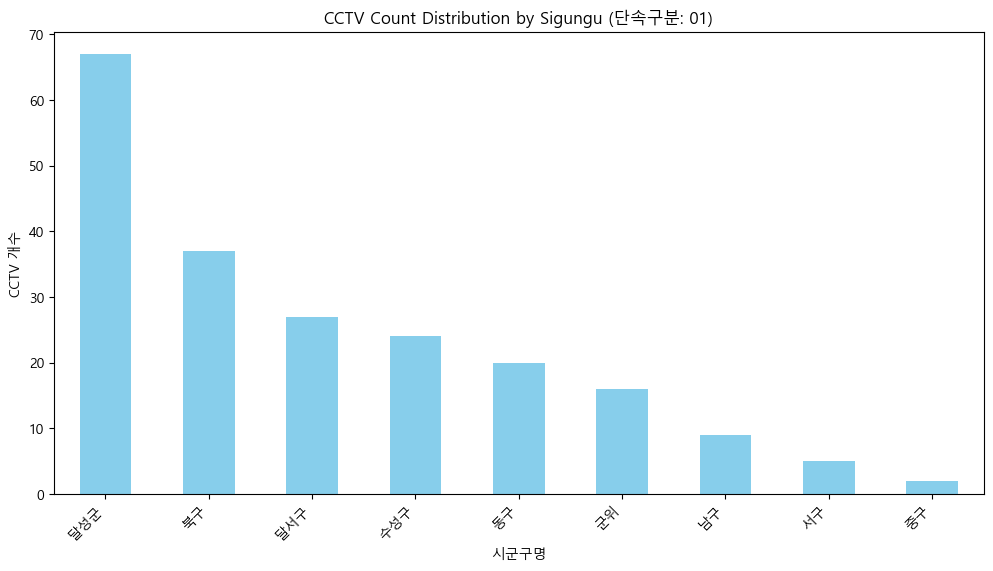

In [23]:

# CSV 파일 읽기
cctv_df = pd.read_csv('./open/external_open/대구 CCTV 정보.csv', encoding="cp949", low_memory=False)
cctv_df['시군구명'] = cctv_df['시군구명'].replace({'군위군': '군위', '달성': '달성군'})
# "단속구분"이 01인 행만 가져오기 단속구분은 int형임. 01->속도단속카메라
filtered_cctv_df = cctv_df[cctv_df['단속구분'] == 1]

# "시군구명"에 대한 CCTV 개수 계산
cctv_count_by_sigungu = filtered_cctv_df['시군구명'].value_counts()

# 데이터 확인
print(cctv_count_by_sigungu)

# 히스토그램 표현
plt.figure(figsize=(12, 6))
cctv_count_by_sigungu.plot(kind='bar', color='skyblue')
plt.title('CCTV Count Distribution by Sigungu (단속구분: 01)')
plt.xlabel('시군구명')
plt.ylabel('CCTV 개수')
plt.xticks(rotation=45, ha='right')
plt.show()

<!-- # 시군구별 CCTV분포도 -->

# 시군구별 ECLO분포도

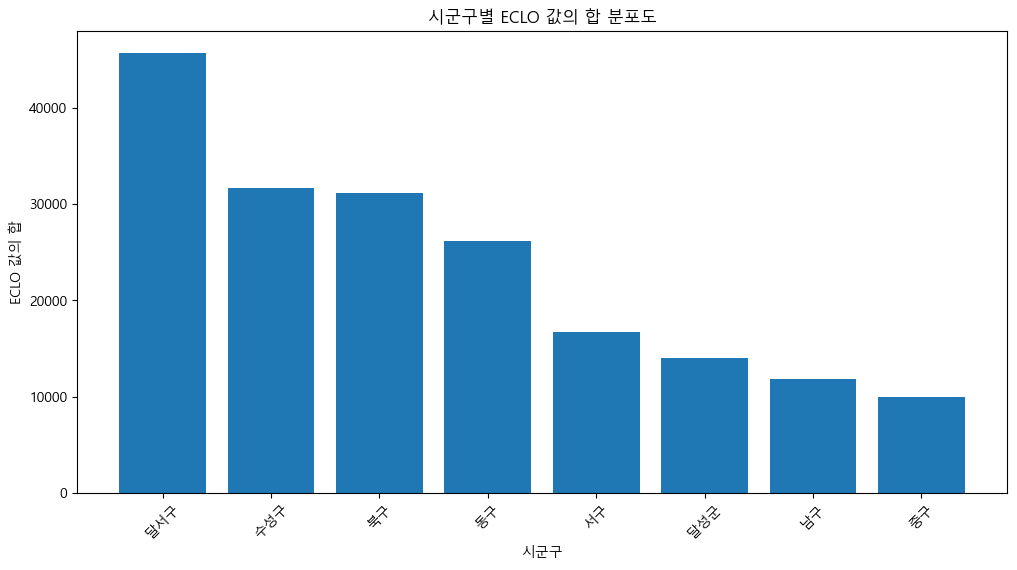

In [11]:
eclo_sum_by_sigungu = train_data.groupby('시군구')['ECLO'].sum().reset_index()

# 내림차순으로 정렬
eclo_sum_by_sigungu = eclo_sum_by_sigungu.sort_values(by='ECLO', ascending=False)

# 분포도 표시
plt.figure(figsize=(12, 6))
plt.bar(eclo_sum_by_sigungu['시군구'], eclo_sum_by_sigungu['ECLO'])
plt.xlabel('시군구')
plt.ylabel('ECLO 값의 합')
plt.title('시군구별 ECLO 값의 합 분포도')
plt.xticks(rotation=45)
plt.show()

# 시군구별 속도제한 CCTV 갯수 데이터프레임

In [26]:
cctv_count_by_sigungu = cctv_df.groupby('시군구명').size().reset_index(name='CCTV 개수')

# 결과 출력
print(cctv_count_by_sigungu)

  시군구명  CCTV 개수
0   군위       24
1   남구       94
2  달서구      277
3  달성군      223
4   동구       92
5   북구      125
6   서구       55
7  수성구      102
8   중구       73


# 시군구별 ECLO합 데이터 프레임

In [27]:
eclo_count_by_sigungu = train_data.groupby('시군구').size().reset_index(name='eclo합')

# 결과 출력
print(eclo_count_by_sigungu)

   시군구  eclo합
0   남구   2559
1  달서구   9891
2  달성군   2767
3   동구   5341
4   북구   6650
5   서구   3495
6  수성구   6707
7   중구   2199


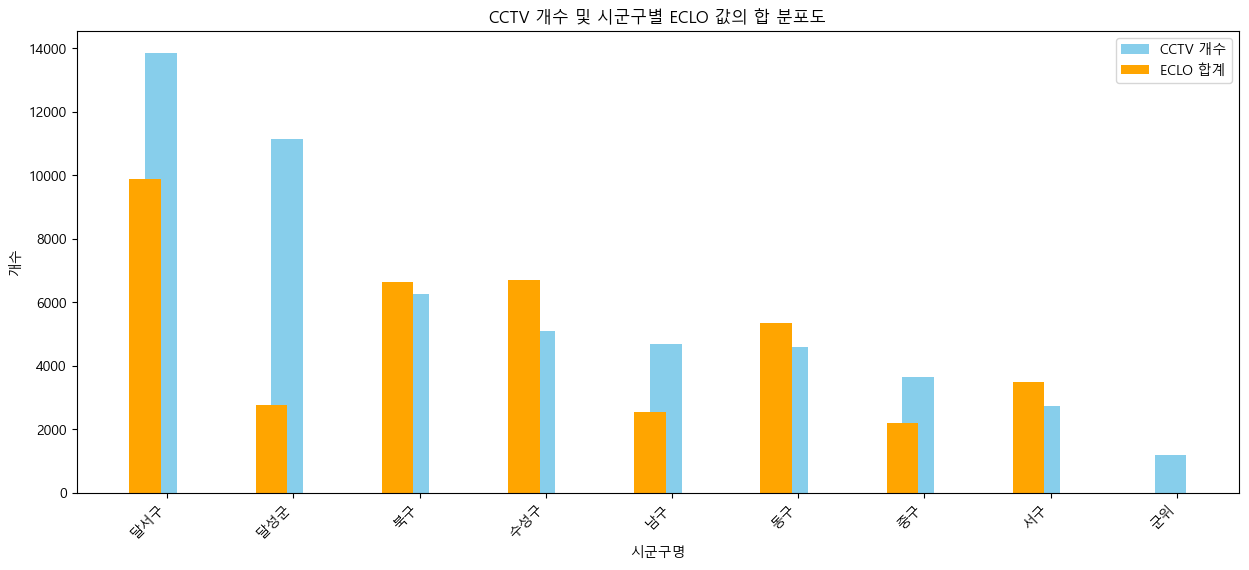

In [36]:
# train 데이터프레임에서 "시군구"를 "시군구명"으로 변경
train_data.rename(columns={'시군구': '시군구명'}, inplace=True)

# 두 데이터프레임을 "시군구명"을 기준으로 합치기
merged_data = pd.merge(train_data, cctv_df, on='시군구명')

# 시군구별 ECLO 값의 합 구하기
eclo_sum_by_sigungu = train_data['시군구명'].value_counts()

# cctv_count_by_sigungu 구하기
cctv_count_by_sigungu = cctv_df['시군구명'].value_counts() * 50

# 막대 그래프 표시
plt.figure(figsize=(15, 6))



# CCTV 개수 막대 그래프
plt.bar(cctv_count_by_sigungu.index, cctv_count_by_sigungu.values, 0.25, color='skyblue', label='CCTV 개수', align='edge')

# ECLO 값의 합 막대 그래프
plt.bar(eclo_sum_by_sigungu.index, eclo_sum_by_sigungu.values, 0.25, color='orange', alpha=1, label='ECLO 합계')

# 축과 레이블 설정
plt.xlabel('시군구명')
plt.ylabel('개수')
plt.title('CCTV 개수 및 시군구별 ECLO 값의 합 분포도')
plt.xticks(index + bar_width / 2, cctv_count_by_sigungu.index, rotation=45, ha='right')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()